In [40]:
import pygimli as pg
import pybert as pb

In [41]:
print(pg.__version__)

1.0.9+86.g4d0671db.with.local.changes.on.dev


In [42]:
print(pg.__file__)

C:\Guenther.T\src\gimli\gimli37\python\pygimli\__init__.py


In [43]:
import os
os.chdir('c:/Guenther.T/src/bert/bert-course/topics/timelapse/strategies')
print(os.getcwd())

c:\Guenther.T\src\bert\bert-course\topics\timelapse\strategies


Data: Electrodes: 42 data: 780


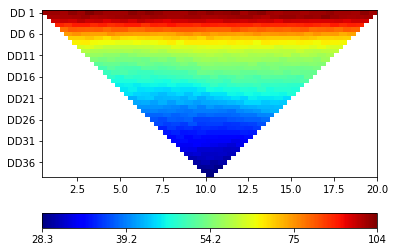

In [44]:
DATA = [pb.load('data{:d}.dat'.format(i)) for i in range(4)]
print(DATA[0])
ax, _ = pb.show(DATA[1])

In [45]:
# Define some options for plotting
cDict = dict(colorBar=True, cMin=10, cMax=100, logScale=1, cMap='Spectral_r')

In [46]:
print(cDict)

{'colorBar': True, 'cMin': 10, 'cMax': 100, 'logScale': 1, 'cMap': 'Spectral_r'}


In [47]:
ert = pb.ERTManager(DATA[0])
ert.invert(zWeight=0.4)

None None
creating mesh...
Mesh: Nodes: 862 Cells: 1546 Boundaries: 2407
Mesh: Nodes: 862 Cells: 1546 Boundaries: 2407


(<matplotlib.axes._subplots.AxesSubplot at 0x190c6d1f278>,
 <matplotlib.colorbar.Colorbar at 0x190c5c18cf8>)

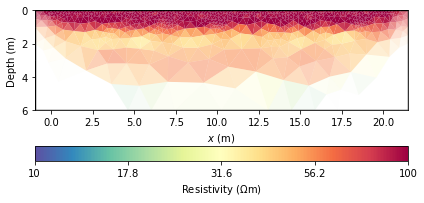

In [48]:
ert.showResult(**cDict)

C:\Software\Anaconda5.3\lib\site-packages\matplotlib\tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


None Mesh: Nodes: 862 Cells: 1546 Boundaries: 2407


NameError: name 'baseline' is not defined

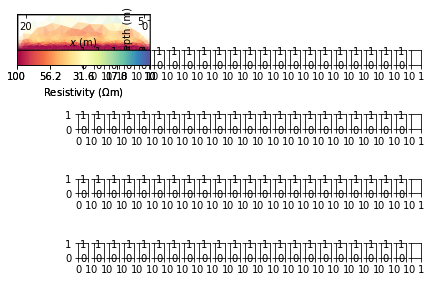

In [50]:
fig, ax = pg.plt.subplots(nrows=len(DATA), ncols=23)
ert.showResult(**cDict, ax=ax[0, 0])
for i, data in enumerate(DATA[1:]):
    # ert.setData(data)
    ert.invert(data)
    ert.showResult(**cDict, ax=ax[i, 0])
    ratio = ert.resistivity / baseline
    pg.show(ert.paraDomain, ratio, ax=ax[i, 1],
            cMap='bwr', cMin=1/1.5, cMax=1.5, colorBar=False)

cDict.pop('colorBar')
cDict['label'] = r'$\rho$ [$\Omega$m]'
pg.mplviewer.colorbar.createColorBarOnly(ax=ax[0, 2], **cDict)
ax[0, 2].set_aspect(0.1)
